Juice transation Classification Using Auto ML (pycaret)

Introduction
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive. In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

Tutorial Objective
In this Lab we will learn: Getting Data: How to import data from the PyCaret repository. Set up Environment: How to set up an experiment in PyCaret’s unsupervised clustering module. Create Model: How to train unsupervised clustering models and assign cluster labels to the training dataset for further analysis. Plot Model: How to analyze model performance using various plots (Elbow, Silhouette, Distribution, etc.). Predict Model: How to assign cluster labels to new and unseen datasets based on a trained model. Save/Load Model: How to save/load model for future use.

Installing PyCaret
Installation is easy and will only take a few minutes. PyCaret’s default installation from pip only installs hard dependencies as listed in the requirements.txt file.
pip install pycaret
To install the full version: pip install pycaret[full]

In [1]:
!pip install pycaret

1.Introduction:

In this Lab project we can see that how to build a model through a method which is quite different from the normal traditional method or so called raw method used in other Machine Learning Works. The drawback of traditional method is that a lot of time is wasted in data pre-processing, feature selection, model selection, hyper parameter tuning etc.. These days many Auto ML frameworks are available which can be easily pip installed and used very effectively. A lot of time-consuming works can be simply done with a couple of lines. In the majority of cases model accuracy level is more in this than the model which is made using the traditional method.

2.About the datasets:

Each row of the table represents a transcaton for retail environment, the target variable is purchase which containts CM and MM two differnt juices, including its feautres price, discount, loyality, store. with classificaton AutoML techicques  we can predict wheater a customer will buy CM or MM. 


# **Imorpting Dataset**

In [2]:
from pycaret.datasets import get_data
dataset = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [3]:
# check the shape of data
dataset.shape

(1070, 19)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM     1070 non-null   float64
 12  SalePriceCH     1070 non-null   float64
 13  PriceDiff       1070 non-null   float64
 14  Store7          1070 non-null   object 
 15  PctDiscMM       1070 non-null   float64
 16  PctDiscCH       1070 non-null   float64
 17  ListPriceDiff   1070 non-null   f

Checking the datasets whether balanced or unbalanced
There is no null values, the data is in a perfect condition so no data pre-processing is need here.  For every classification problems it is better if the datasets are balanced(i.e. : if there are two classes infected(1) and non-infected(0) with total 1000 rows of data, we can say the datasets is balanced if 50% of data set is infected(1) and the other 50% is not infected(0)). In our case  its about 61% and 41%. Let’s check this condition below.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Data visualisation 
import matplotlib.pyplot as plt # Data visualisation 

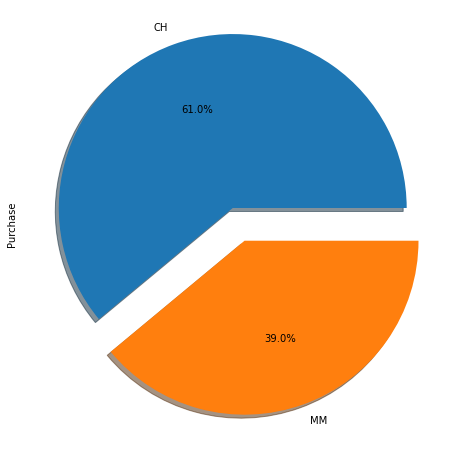

In [6]:
dataset['Purchase'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

Now we are plotting the graphs by comparing each of the columns.

/Users/shamima/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


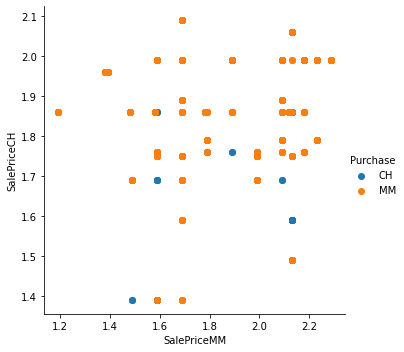

In [7]:
sns.FacetGrid(dataset,hue='Purchase',size=5).map(plt.scatter,'SalePriceMM','SalePriceCH').add_legend()

/Users/shamima/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


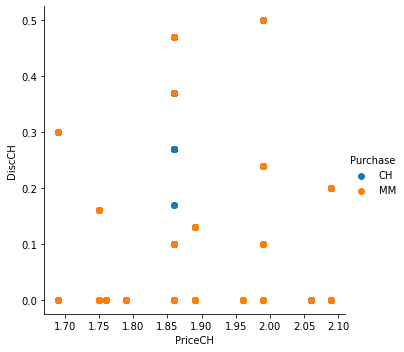

In [8]:
sns.FacetGrid(dataset,hue='Purchase',size=5).map(plt.scatter,'PriceCH','DiscCH').add_legend()

/Users/shamima/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


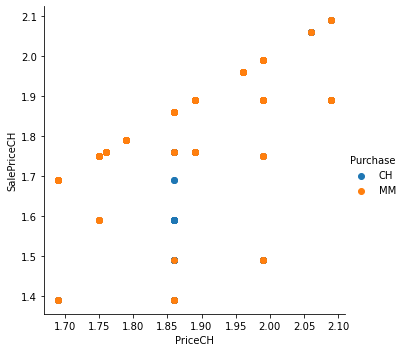

In [9]:
sns.FacetGrid(dataset,hue='Purchase',size=5).map(plt.scatter,'PriceCH','SalePriceCH').add_legend()

/Users/shamima/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


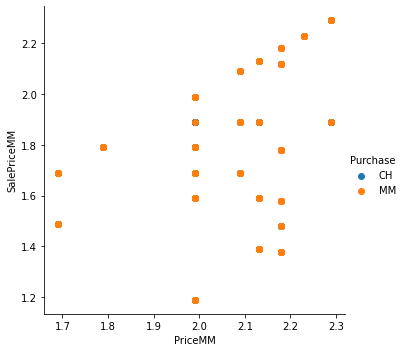

In [10]:
sns.FacetGrid(dataset,hue='Purchase',size=5).map(plt.scatter,'PriceMM','SalePriceMM').add_legend()

Preparing the data for model selection In this step we are splitting the datasets into two. The first part contains 95% of the data that is used for training and testing. The remaining 5% is stored and is used to try with the final model we developed (This data is named as unseen data).

In [11]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

In [12]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1016, 19)
Unseen Data For Predictions (54, 19)


In [13]:
data['Purchase'].value_counts()

CH    629
MM    387
Name: Purchase, dtype: int64

**Setting up Environment**

In [14]:
# Importing pycaret classification method

from pycaret.classification import *


OSError: dlopen(/Users/shamima/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/shamima/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [ ]:
# This is the first step of model selection
# Here the data is our dataset, target is the labeled column(dependent variable), section is is random number for future identification.
exp = setup(data = data, target = 'Purchase', session_id=786 )

# After this we will get a list of our columns and its type, just conferm they are the same. Then hit enter.

,Description,Value
0,session_id,786
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1016, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# **Compare Models:**

Comparing the models
After confirming the column types, we can run our datasets with a couple of ML algorithms and compare the performance, as shown below.

In [ ]:
#This comand is used to compare different models with our dataset.
#The acuuracy,F1 etc of each model is listed in a table.
#Choose which model you want
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8383,0.8955,0.7595,0.7986,0.7773,0.6506,0.6524,0.017
lr,Logistic Regression,0.8369,0.8968,0.7406,0.8074,0.7703,0.6445,0.6481,0.384
ridge,Ridge Classifier,0.8341,0.0000,0.7520,0.7928,0.7698,0.6406,0.6431,0.014
gbc,Gradient Boosting Classifier,0.8214,0.8961,0.7443,0.7718,0.7549,0.6148,0.6178,0.143
ada,Ada Boost Classifier,0.8172,0.8710,0.7177,0.7774,0.7423,0.6016,0.6061,0.116
lightgbm,Light Gradient Boosting Machine,0.8088,0.8810,0.7443,0.7479,0.7421,0.5905,0.5944,0.095
rf,Random Forest Classifier,0.8060,0.8867,0.7328,0.7487,0.7357,0.5829,0.5882,0.512
et,Extra Trees Classifier,0.7779,0.8583,0.6580,0.7268,0.6866,0.5158,0.5208,0.464
nb,Naive Bayes,0.7736,0.8404,0.7449,0.6812,0.7108,0.5254,0.5278,0.016
dt,Decision Tree Classifier,0.7722,0.7570,0.6962,0.6968,0.6922,0.5122,0.5164,0.017


In [ ]:
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


Imblance problem

# **Creat Model**

In [ ]:
# With this command we are creating a Naives Byes model
# The code for Naives Byes is " nb "
# fold is the number of fold you want

nb_model = create_model('nb', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7361,0.7877,0.6667,0.6429,0.6545,0.4412,0.4414
1,0.8451,0.9074,0.8889,0.7500,0.8136,0.6826,0.6899
2,0.7324,0.7845,0.6296,0.6538,0.6415,0.4281,0.4283
3,0.7183,0.8350,0.7037,0.6129,0.6552,0.4190,0.4218
4,0.7887,0.8880,0.8148,0.6875,0.7458,0.5672,0.5732
5,0.6761,0.7054,0.6296,0.5667,0.5965,0.3272,0.3284
6,0.8028,0.8111,0.7308,0.7308,0.7308,0.5752,0.5752
7,0.7887,0.8470,0.7692,0.6897,0.7273,0.5557,0.5579
8,0.8028,0.9188,0.8077,0.7000,0.7500,0.5886,0.5927


In [ ]:
dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7083,0.6778,0.5556,0.6250,0.5882,0.3636,0.3651
1,0.7746,0.7609,0.7037,0.7037,0.7037,0.5219,0.5219
2,0.6620,0.6271,0.4815,0.5652,0.5200,0.2617,0.2637
3,0.8451,0.8392,0.8148,0.7857,0.8000,0.6736,0.6739
4,0.7887,0.8081,0.8889,0.6667,0.7619,0.5789,0.5983
5,0.7183,0.6869,0.5556,0.6522,0.6000,0.3847,0.3877
6,0.8310,0.7936,0.6538,0.8500,0.7391,0.6173,0.6289
7,0.7606,0.7543,0.7308,0.6552,0.6909,0.4965,0.4984
8,0.8028,0.7957,0.7692,0.7143,0.7407,0.5820,0.5830


In [ ]:
Ir = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.8346,0.7037,0.7917,0.7451,0.6061,0.6086
1,0.9296,0.9596,0.8519,0.9583,0.9020,0.8473,0.8509
2,0.7606,0.8813,0.5926,0.7273,0.6531,0.4732,0.4789
3,0.8451,0.8939,0.8148,0.7857,0.8000,0.6736,0.6739
4,0.8592,0.9352,0.8889,0.7742,0.8276,0.7095,0.7143
5,0.7465,0.8241,0.5926,0.6957,0.6400,0.4463,0.4497
6,0.8169,0.8709,0.6538,0.8095,0.7234,0.5889,0.5964
7,0.8028,0.8795,0.6538,0.7727,0.7083,0.5610,0.5654
8,0.8873,0.9538,0.8462,0.8462,0.8462,0.7573,0.7573


This table shows the accuracy and other readings, for all the 10 folds. Now tuning of the hyper parameters. Tuning the hyper parameters will be useful to increase the accuracy and other features. For unbalanced datasets we mainly look F1 score, as our datasets our balanced we can use the accuracy. For this datasets we are already getting 81% accuracy.So without tuning the hyper parameters, it will work. Tuning the hyper parameters

# **Tune Model**

In [ ]:
nb_tuned = tune_model(nb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7901,0.6296,0.7391,0.6800,0.5115,0.5153
1,0.8873,0.9184,0.7778,0.9130,0.8400,0.7539,0.7597
2,0.7042,0.8173,0.5185,0.6364,0.5714,0.3492,0.3535
3,0.7746,0.8165,0.6667,0.7200,0.6923,0.5149,0.5159
4,0.8028,0.8855,0.7037,0.7600,0.7308,0.5756,0.5766
5,0.6479,0.7113,0.4815,0.5417,0.5098,0.2366,0.2376
6,0.8169,0.8632,0.6538,0.8095,0.7234,0.5889,0.5964
7,0.8028,0.8368,0.7308,0.7308,0.7308,0.5752,0.5752
8,0.8310,0.9077,0.7692,0.7692,0.7692,0.6359,0.6359


In [ ]:

dt_tuned = tune_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.8663,0.7778,0.7500,0.7636,0.6176,0.6179
1,0.8028,0.8582,0.6296,0.8095,0.7083,0.5629,0.5730
2,0.7465,0.7727,0.5185,0.7368,0.6087,0.4295,0.4440
3,0.8451,0.8923,0.7778,0.8077,0.7925,0.6689,0.6692
4,0.8451,0.8674,0.9259,0.7353,0.8197,0.6870,0.7010
5,0.7606,0.7938,0.6667,0.6923,0.6792,0.4883,0.4886
6,0.8169,0.8491,0.6923,0.7826,0.7347,0.5957,0.5983
7,0.8169,0.8581,0.8077,0.7241,0.7636,0.6149,0.6174
8,0.8732,0.9085,0.8077,0.8400,0.8235,0.7247,0.7250


# **Ebsemble Model**

In [ ]:
begged_dt = ensemble_model(nb_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7917,0.7967,0.6296,0.7727,0.6939,0.5385,0.5449
1,0.8451,0.9192,0.7778,0.8077,0.7925,0.6689,0.6692
2,0.7042,0.8182,0.5185,0.6364,0.5714,0.3492,0.3535
3,0.7746,0.8165,0.6667,0.7200,0.6923,0.5149,0.5159
4,0.7606,0.8813,0.7037,0.6786,0.6909,0.4956,0.4958
5,0.6620,0.7045,0.5185,0.5600,0.5385,0.2724,0.2729
6,0.8028,0.8496,0.6154,0.8000,0.6957,0.5535,0.5639
7,0.8028,0.8376,0.7692,0.7143,0.7407,0.5820,0.5830
8,0.8310,0.9051,0.7692,0.7692,0.7692,0.6359,0.6359


In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

NameError: ignored

# **Blend Models**

In [ ]:
lr = create_model('lr', verbose=False)
lda = create_model('lda', verbose=False)
gbc = create_model('gbc', verbose=False)

In [ ]:
blender = blend_models(estimator_list=[lr,lda,gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8194,0.8486,0.6667,0.8182,0.7347,0.6000,0.6072
1,0.9014,0.9478,0.8148,0.9167,0.8627,0.7862,0.7896
2,0.7887,0.8855,0.6667,0.7500,0.7059,0.5419,0.5442
3,0.8592,0.9099,0.8519,0.7931,0.8214,0.7054,0.7066
4,0.8592,0.9318,0.9259,0.7576,0.8333,0.7135,0.7243
5,0.7746,0.8359,0.6667,0.7200,0.6923,0.5149,0.5159
6,0.8169,0.8786,0.6538,0.8095,0.7234,0.5889,0.5964
7,0.7887,0.8795,0.6923,0.7200,0.7059,0.5411,0.5414
8,0.8732,0.9521,0.8077,0.8400,0.8235,0.7247,0.7250


# **Analyze Model**

Plotting the ROC Curves As the curve moves towards the x and y axis, the performance is increased.

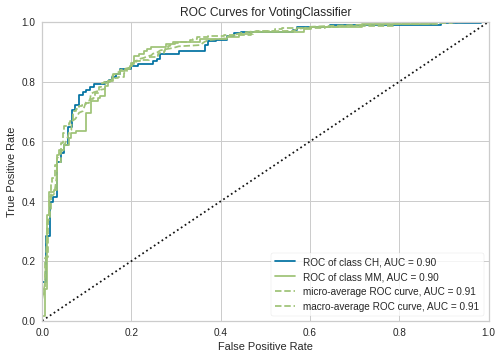

In [ ]:
plot_model(blender)

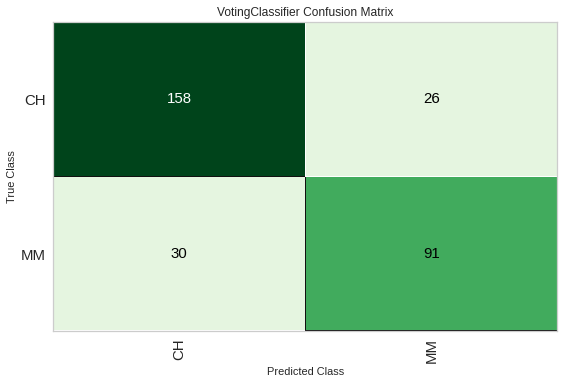

In [ ]:
plot_model(blender, plot = 'confusion_matrix')

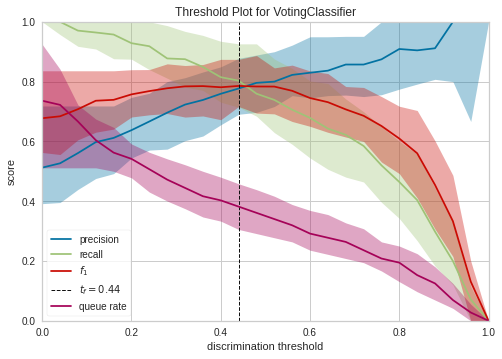

In [ ]:
plot_model(blender, plot = 'threshold')

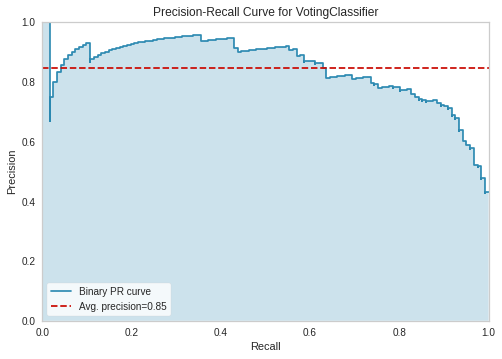

In [ ]:
plot_model(blender, plot = 'pr')

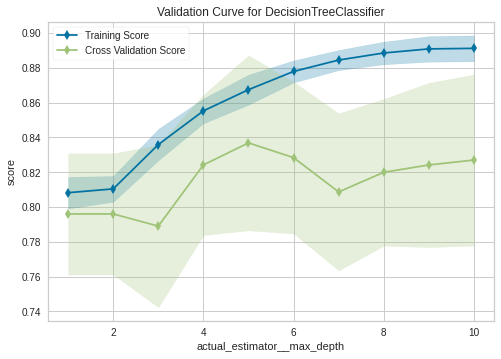

In [ ]:
plot_model(dt_tuned, plot = 'vc')

In [ ]:
plot_model(dt, plot = 'boundary')

NameError: ignored

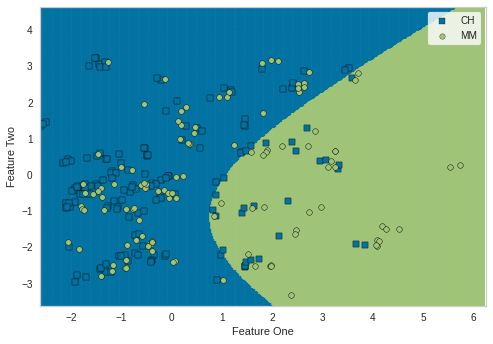

In [ ]:
plot_model(nb_tuned, plot = 'boundary')

In [ ]:
evaluate_model(nb_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Predicting the accuracy using the test datasets

In [ ]:
predict_model(nb_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7607,0.833,0.6942,0.7,0.6971,0.4993,0.4993


Checking with the unseen data

Initially we separated a part of the datasets as unseen data set for checking the final developed model. Below we are checking this. The result is a data frame with Label and the score(last two columns). Where the label is the predicted label and score is how much percentage does the machine think of having an accuracy.

In [ ]:
new_prediction = predict_model(nb_tuned, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0,0.6398,0,0,0,0,0


In [ ]:
new_prediction

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,...,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Label,Score
0,1017,CH,236,7,1.75,1.99,0.00,0.40,0,0,...,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0,CH,0.7605
1,1018,CH,237,7,1.75,1.99,0.00,0.40,0,0,...,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0,CH,0.7750
2,1019,CH,240,7,1.86,2.09,0.00,0.00,0,0,...,2.09,1.86,0.23,Yes,0.000000,0.000000,0.23,0,CH,0.9135
3,1020,MM,240,7,1.86,2.09,0.00,0.00,0,0,...,2.09,1.86,0.23,Yes,0.000000,0.000000,0.23,0,CH,0.9158
4,1021,MM,244,7,1.86,2.09,0.00,0.20,0,0,...,1.89,1.86,0.03,Yes,0.095694,0.000000,0.23,0,CH,0.8336
5,1022,CH,252,2,1.89,2.09,0.13,0.00,0,0,...,2.09,1.76,0.33,No,0.000000,0.068783,0.20,2,CH,0.6053
6,1023,MM,254,4,1.99,2.29,0.00,0.00,1,0,...,2.29,1.99,0.30,No,0.000000,0.000000,0.30,4,CH,0.9838
7,1024,CH,256,2,1.89,2.18,0.13,0.00,0,0,...,2.18,1.76,0.42,No,0.000000,0.068783,0.29,2,CH,0.6273
8,1025,CH,258,4,1.99,2.29,0.00,0.00,0,0,...,2.29,1.99,0.30,No,0.000000,0.000000,0.30,4,CH,0.9412
9,1026,CH,260,7,1.86,2.13,0.00,0.24,0,0,...,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0,CH,0.8562


Summary
As we see above, we got a accuracy model with 83% accuracy. Auto Ml is preferred more because it’s less time consuming and gives a very good result. The hyper parameter tuning is not that easy for the less experienced people, but it makes a huge difference in the performance of the model.